## 1. Data Preparation - Import the dataset

In [233]:
# Importing the pandas library for data handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

In [234]:
# Loading the dataset from a csv file
dv = pd.read_csv('Customer Service_Requests_from_2010_to_Present.csv')

/var/folders/yb/xstwtwfn1v90cm739jjckrd00000gn/T/ipykernel_12486/2053461375.py:2: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  dv = pd.read_csv('Customer Service_Requests_from_2010_to_Present.csv')


In [235]:
# Displaying the shape of the dataset (rows, columns) to verify the import
print("Shape of the Dataset (Rows, Columns):")
print(dv.shape)

Shape of the Dataset (Rows, Columns):
(300698, 53)


## 2. Data Preparation - Provide your insight on the information and details that the provided dataset carries.

In [237]:
# Display basic information about the dataset
print("Dataset Information:")
print(dv.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 


In [238]:
# Showing the column names to understand what data is included
print("\nColumn Names in the Dataset:")
print(list(dv.columns))


Column Names in the Dataset:
['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'City', 'Landmark', 'Facility Type', 'Status', 'Due Date', 'Resolution Description', 'Resolution Action Updated Date', 'Community Board', 'Borough', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough', 'School Name', 'School Number', 'School Region', 'School Code', 'School Phone Number', 'School Address', 'School City', 'School State', 'School Zip', 'School Not Found', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Latitude', 'Longitude', 'Locati

In [239]:
# Count unique values in a few key columns to get a sense of variety
print("\nNumber of Unique Values in Key Columns:")
print("Unique Complaint Types:", dv['Complaint Type'].nunique())
print("Unique Boroughs:", dv['Borough'].nunique())
print("Unique Statuses:", dv['Status'].nunique())



Number of Unique Values in Key Columns:
Unique Complaint Types: 24
Unique Boroughs: 6
Unique Statuses: 4


In [240]:
# Count unique values in all columns to get a sense of variety
dv.nunique()

Unique Key                        300698
Created Date                      259493
Closed Date                       237165
Agency                                 1
Agency Name                            3
Complaint Type                        24
Descriptor                            45
Location Type                         18
Incident Zip                         201
Incident Address                  107652
Street Name                         7320
Cross Street 1                      5982
Cross Street 2                      5823
Intersection Street 1               4413
Intersection Street 2               4172
Address Type                           5
City                                  53
Landmark                             116
Facility Type                          1
Status                                 4
Due Date                          259851
Resolution Description                18
Resolution Action Updated Date    237895
Community Board                       75
Borough         

In [241]:
# Checking for missing values in each column
print("\nMissing Values in Each Column:")
print(dv.isnull().sum())


Missing Values in Each Column:
Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board          

## 3. Data Preparation - Convert the columns "Created Date" and "Closed Date" to datetime datatype and create a new column "Request_Closing_Time" as the time elapsed between request creation and request closing

In [243]:
# Convert 'Created Date' column from string to datetime format
dv['Created Date'] = pd.to_datetime(dv['Created Date'])


/var/folders/yb/xstwtwfn1v90cm739jjckrd00000gn/T/ipykernel_12486/1050588263.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dv['Created Date'] = pd.to_datetime(dv['Created Date'])


In [244]:
# Convert 'Closed Date' column from string to datetime format
dv['Closed Date'] = pd.to_datetime(dv['Closed Date'])

/var/folders/yb/xstwtwfn1v90cm739jjckrd00000gn/T/ipykernel_12486/1422039876.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dv['Closed Date'] = pd.to_datetime(dv['Closed Date'])


In [245]:
# Create 'Request_Closing_Time' and extract only the days component as integers
dv['Request_Closing_Time'] = (dv['Closed Date'] - dv['Created Date']).dt.days


In [246]:
# Showing a sample of the new 'Request_Closing_Time' column to confirm it worked
print("\nSample of Request_Closing_Time:")
print(dv['Request_Closing_Time'].head())


Sample of Request_Closing_Time:
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Request_Closing_Time, dtype: float64


## 4. Data Preparation - Write a python program to drop irrelevant Columns which are listed below.

In [248]:
# List of irrelevant columns to drop, as provided in the question
columns_to_drop = [
    'Agency Name', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
    'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'Park Facility Name',
    'Park Borough', 'School Name', 'School Number', 'School Region', 'School Code',
    'School Phone Number', 'School Address', 'School City', 'School State', 'School Zip',
    'School Not Found', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
    'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
    'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name',
    'Landmark', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Due Date',
    'Resolution Action Updated Date', 'Community Board', 'Facility Type', 'Location'
]

In [249]:
# Drop the listed columns from the dataframe
dv = dv.drop(columns=columns_to_drop)


In [250]:
# Display the remaining columns to verify the drop
print("Remaining Columns After Dropping Irrelevant Ones:")
print(list(dv.columns))

Remaining Columns After Dropping Irrelevant Ones:
['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 'City', 'Status', 'Resolution Description', 'Borough', 'Latitude', 'Longitude', 'Request_Closing_Time']


## 5. Data Preparation - Write a python program to remove the NaN missing values from updated dataframe.

In [252]:
# Display the shape and missing values before removing NaN
print("Shape Before Removing NaN (Rows, Columns):")
print(dv.shape)
print("\nMissing Values in Each Column Before Removing NaN:")
print(dv.isnull().sum())

Shape Before Removing NaN (Rows, Columns):
(300698, 15)

Missing Values in Each Column Before Removing NaN:
Unique Key                   0
Created Date                 0
Closed Date               2164
Agency                       0
Complaint Type               0
Descriptor                5914
Location Type              131
Incident Zip              2615
City                      2614
Status                       0
Resolution Description       0
Borough                      0
Latitude                  3540
Longitude                 3540
Request_Closing_Time      2164
dtype: int64


In [253]:
# Remove rows with any NaN values from the updated dataframe
dv = dv.dropna()

In [254]:
# Display the shape and missing values after removing NaN to verify
print("\nShape After Removing NaN (Rows, Columns):")
print(dv.shape)
print("\nMissing Values in Each Column After Removing NaN:")
print(dv.isnull().sum())


Shape After Removing NaN (Rows, Columns):
(291107, 15)

Missing Values in Each Column After Removing NaN:
Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Status                    0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
Request_Closing_Time      0
dtype: int64


## 6. Data Preparation - Write a python program to see the unique values from all the columns in the dataframe.

In [256]:
# Loop through each column and print its unique values
print("Unique Values in Each Column of the Dataframe:")
for column in dv.columns:
    print(f"\nColumn: '{column}'")
    print("Unique Values:", dv[column].unique())
    print("Number of Unique Values:", dv[column].nunique())

Unique Values in Each Column of the Dataframe:

Column: 'Unique Key'
Unique Values: [32310363 32309934 32309159 ... 30283424 30280004 30281825]
Number of Unique Values: 291107

Column: 'Created Date'
Unique Values: <DatetimeArray>
['2015-12-31 23:59:45', '2015-12-31 23:59:44', '2015-12-31 23:59:29',
 '2015-12-31 23:57:46', '2015-12-31 23:56:58', '2015-12-31 23:56:30',
 '2015-12-31 23:55:32', '2015-12-31 23:54:05', '2015-12-31 23:53:58',
 '2015-12-31 23:52:58',
 ...
 '2015-03-29 00:42:48', '2015-03-29 00:37:15', '2015-03-29 00:35:28',
 '2015-03-29 00:35:23', '2015-03-29 00:35:04', '2015-03-29 00:34:32',
 '2015-03-29 00:33:28', '2015-03-29 00:33:03', '2015-03-29 00:33:02',
 '2015-03-29 00:33:01']
Length: 251970, dtype: datetime64[ns]
Number of Unique Values: 251970

Column: 'Closed Date'
Unique Values: <DatetimeArray>
['2016-01-01 00:55:00', '2016-01-01 01:26:00', '2016-01-01 04:51:00',
 '2016-01-01 07:43:00', '2016-01-01 03:24:00', '2016-01-01 01:50:00',
 '2016-01-01 01:53:00', '2016-01

## 7. Data Analysis - Write a Python program to show summary statistics of sum, mean, standard deviation, skewness, and kurtosis of the data frame

In [258]:
# Select only numeric columns for statistics
numeric_dv = dv.select_dtypes(include=[np.number])

In [259]:
# Loop through each numeric column and calculate statistics
print("Summary Statistics for Each Numeric Column:\n")
for column in numeric_dv.columns:
    print(f"\nColumn: {column}")
    print(f"  Sum: {numeric_dv[column].sum()}")
    print(f"  Mean: {numeric_dv[column].mean()}")
    print(f"  Standard Deviation: {numeric_dv[column].std()}")
    print(f"  Skewness: {numeric_dv[column].skew()}")  
    print(f"  Kurtosis: {numeric_dv[column].kurt()}")  

Summary Statistics for Each Numeric Column:


Column: Unique Key
  Sum: 9112107955295
  Mean: 31301576.242738925
  Standard Deviation: 575377.7387071877
  Skewness: 0.016897722422296077
  Kurtosis: -1.1765926558306596

Column: Incident Zip
  Sum: 3160833212.0
  Mean: 10857.977348535074
  Standard Deviation: 580.2807740122854
  Skewness: -2.553955898131983
  Kurtosis: 37.827777247855444

Column: Latitude
  Sum: 11855530.75877829
  Mean: 40.72568079358549
  Standard Deviation: 0.08241087015112669
  Skewness: 0.123114382634822
  Kurtosis: -0.7348182547719988

Column: Longitude
  Sum: -21520095.167681944
  Mean: -73.92503501352404
  Standard Deviation: 0.07865355626291955
  Skewness: -0.3127386420474719
  Kurtosis: 1.455600458821316

Column: Request_Closing_Time
  Sum: 4658.0
  Mean: 0.01600098932694851
  Standard Deviation: 0.18022536851967688
  Skewness: 34.23907102031056
  Kurtosis: 3081.4029084435288


## 8. Data Analysis - Write a Python program to calculate and show correlation of all variables.

In [261]:
# Calculate and show correlation of all variables
print("Correlation of All Numeric Columns:\n")
print(numeric_dv.corr())

Correlation of All Numeric Columns:

                      Unique Key  Incident Zip  Latitude  Longitude  \
Unique Key              1.000000      0.025492 -0.032613  -0.008621   
Incident Zip            0.025492      1.000000 -0.499081   0.385934   
Latitude               -0.032613     -0.499081  1.000000   0.368819   
Longitude              -0.008621      0.385934  0.368819   1.000000   
Request_Closing_Time    0.034167      0.018569  0.013524   0.060694   

                      Request_Closing_Time  
Unique Key                        0.034167  
Incident Zip                      0.018569  
Latitude                          0.013524  
Longitude                         0.060694  
Request_Closing_Time              1.000000  


## 9. Data Exploration

## 9.1. Four Major Insights through Visualization after data mining

## 9.1.1. Distribution of Top 10 Complaint Types across NYC

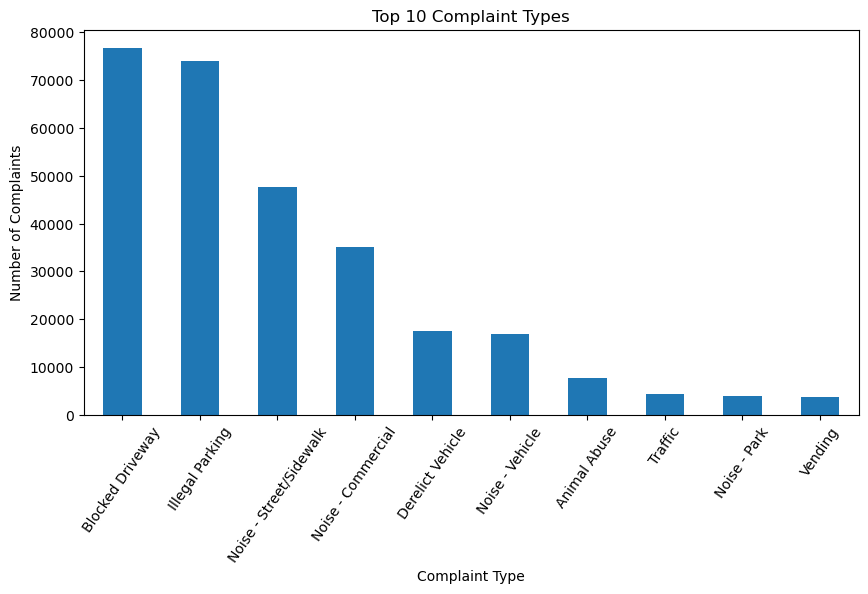

In [265]:
import matplotlib.pyplot as plt
top_complaints = dv['Complaint Type'].value_counts().head(10)
top_complaints.plot(kind='bar', figsize=(10, 5), title='Top 10 Complaint Types')
plt.xlabel("Complaint Type")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=55)
plt.show()

## 9.1.2. Proportional Analysis of service Request by borough

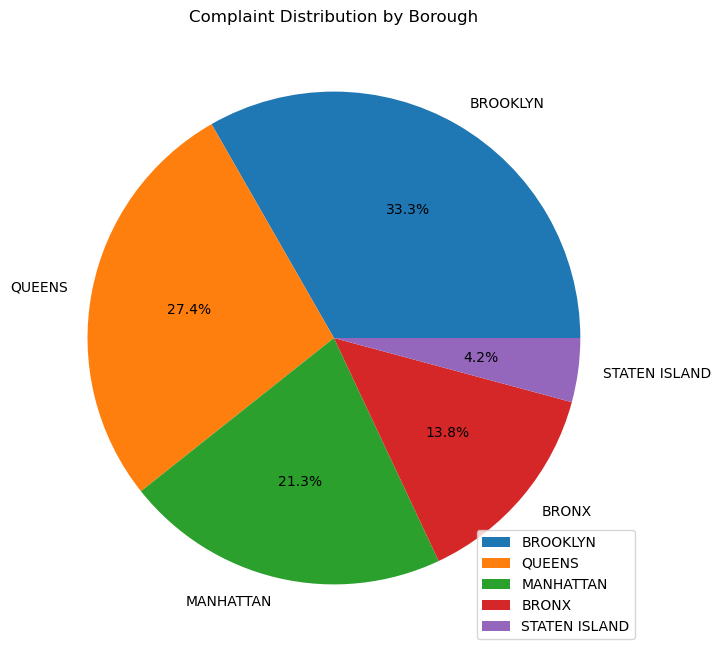

In [267]:
dv['Borough'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Complaint Distribution by Borough')
plt.ylabel("")
plt.legend()
plt.show()

## 9.1.3. Geospatial Mapping of service request concentrations

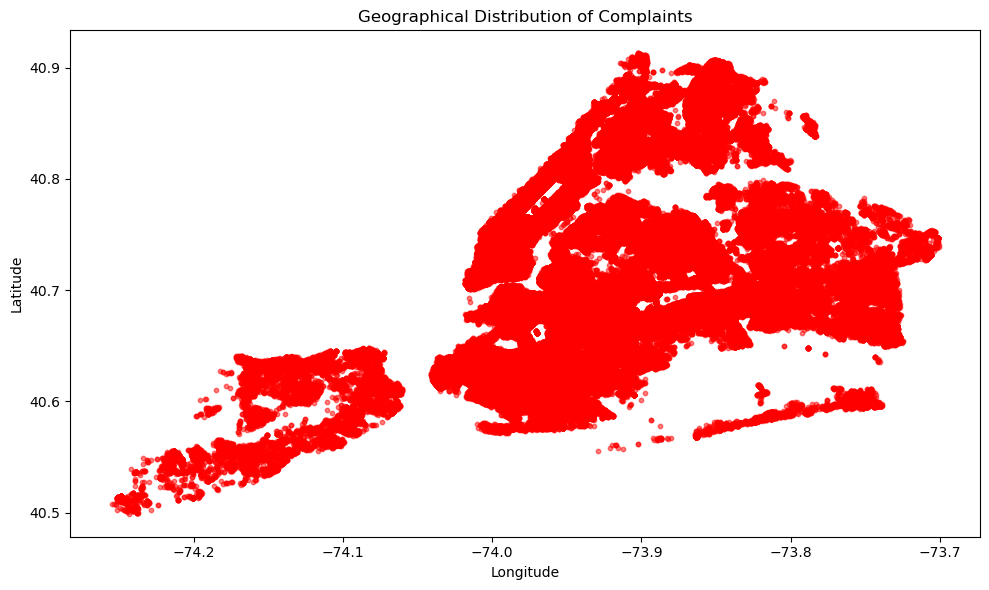

In [269]:
import matplotlib.pyplot as plt

# Assuming 'Latitude' and 'Longitude' are the columns for geographical coordinates
plt.figure(figsize=(10,6))
plt.scatter(dv['Longitude'], dv['Latitude'], alpha=0.5, s=10, color='red')
plt.title('Geographical Distribution of Complaints')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

## 9.1.4. Comparative Analysis of Resolution Timeframes by complaint category

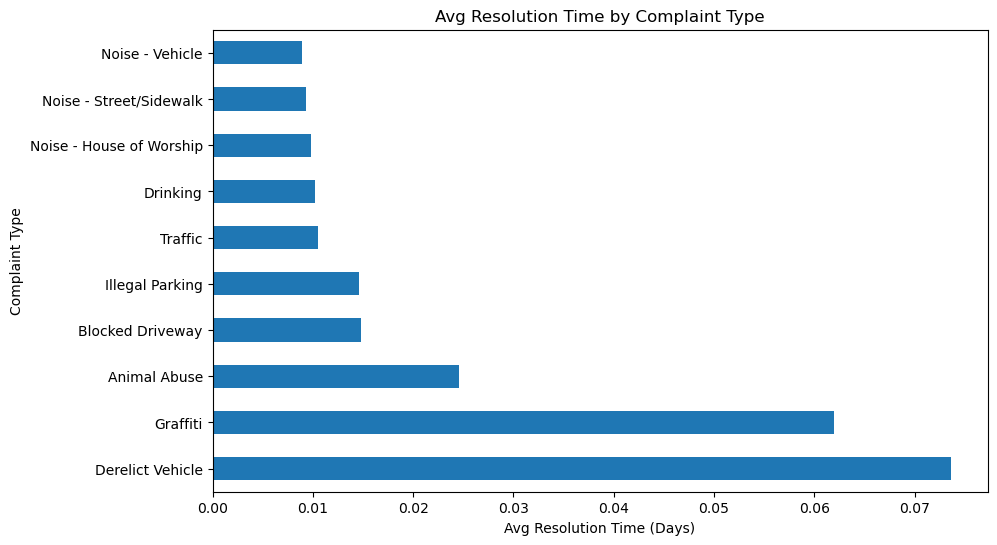

In [271]:
avg_resolution_time = dv.groupby('Complaint Type')['Request_Closing_Time'].mean().sort_values(ascending=False).head(10)
avg_resolution_time.plot(kind='barh', figsize=(10, 6), title='Avg Resolution Time by Complaint Type')
plt.xlabel("Avg Resolution Time (Days)")
plt.ylabel("Complaint Type")
plt.show()

## 9.2. Ilustrating Graph by arranging the complaint type according to their average "Request_Closing_Time" categorized by various locations

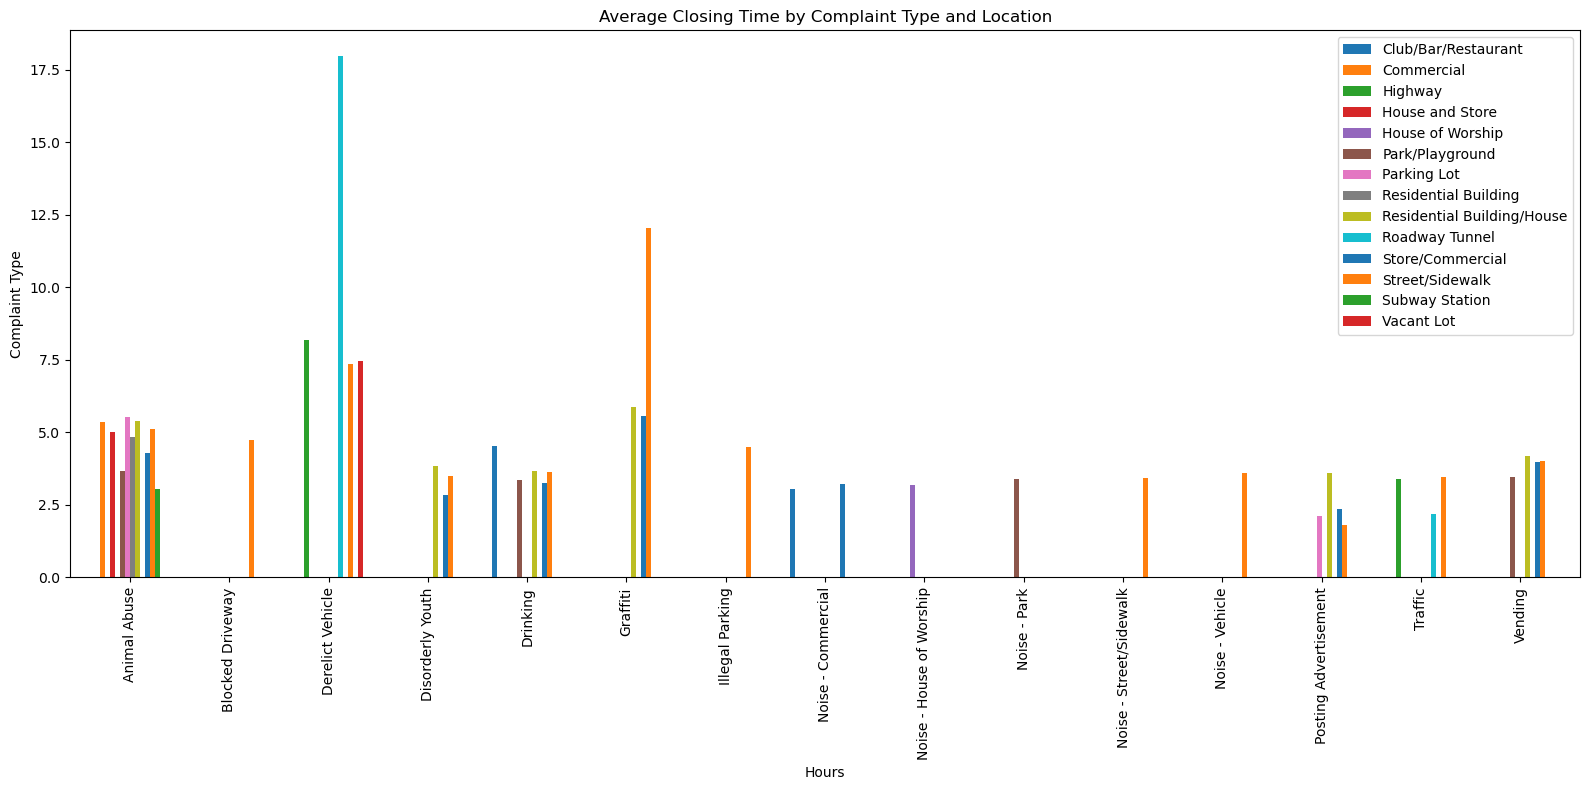

In [273]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate duration in hours
dv['Request_Closing_Time'] = dv['Closed Date'] - dv['Created Date']
dv['Request_Duration_Hours'] = dv['Request_Closing_Time'].dt.total_seconds() / 3600

# Group by complaint type and location
grouped = dv.groupby(['Complaint Type', 'Location Type'])['Request_Duration_Hours'].mean().reset_index()

# Pivot for plotting
pivot = grouped.pivot(index='Complaint Type', columns='Location Type', values='Request_Duration_Hours')

# Plot
pivot.plot(kind='bar', figsize=(16, 8), width=0.7)
plt.title('Average Closing Time by Complaint Type and Location')
plt.xlabel('Hours')
plt.ylabel('Complaint Type')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

## 10. Statistical Testing

## 10.1. Test 1- Checking whether the average response time across complaint type is similar or not 

In [276]:
import pandas as pd
from scipy.stats import f_oneway

# 1. Convert dates to datetime
dv['Created Date'] = pd.to_datetime(dv['Created Date'])
dv['Closed Date'] = pd.to_datetime(dv['Closed Date'])

# 2. Calculate response time in hours
dv['Response_Time_Hours'] = (dv['Closed Date'] - dv['Created Date']).dt.total_seconds() / 3600

# 3. Create empty list to store data
groups = []

# 4. Loop through each complaint type
complaint_types = dv['Complaint Type'].unique()

for complaint in complaint_types:
    times = dv[dv['Complaint Type'] == complaint]['Response_Time_Hours']
    times = times.dropna()  # Remove missing values
    groups.append(times)

# 5. Do ANOVA test
f_stat, p_value = f_oneway(*groups)

# 6. Show results
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

# 7. Final interpretation
if p_value < 0.05:
    print("Result: Reject H0 → Response times are different between complaint types.")
else:
    print("Result: Fail to reject H0 → Response times are similar between complaint types.")

F-Statistic: 578.9120337398355
P-Value: 0.0
Result: Reject H0 → Response times are different between complaint types.


## 10.2. Test 2 - Checking whether the type of complaint or service requested and location are related

In [278]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table (cross-tabulation)
# Rows = Complaint Type, Columns = Location Typ
contingency_table = pd.crosstab(dv['Complaint Type'], dv['Location Type'])

# Perform chi-square test for independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)

# Interpret the result
if p_value < 0.05:
    print("Result: Reject H₀ → Complaint type and location type are related.")
else:
    print("Result: Fail to reject H₀ → No significant relationship between complaint type and location type.")

Chi-square Statistic: 1049203.872020897
P-value: 0.0
Degrees of Freedom: 182
Result: Reject H₀ → Complaint type and location type are related.
